## Project: Netflix Dataset
### Table of Contents
* Data Cleaning
* EDA
   * What is the most 5 populer type?
   * What is the distribution of cars according to title status?
   * What is the trend of data over time?
   * How the price change over years?
   * What is the most popular condition?
   * What is the relation between price and distination?
   * What is the corr between price , dis and cylinders?
   * How price  effected by fuel type?
   * what is the avgr price based on manufacturer?
   * What is the distribution of cars based on cylinders?
   * What is the most state has models in USA?
   * Distribution on the map?  
  

## Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import datetime 
import warnings
warnings.filterwarnings("ignore")
import os

In [37]:
import folium
from folium.plugins import HeatMap
from folium import plugins
from folium.plugins import HeatMap

In [2]:
df='/kaggle/input/craigslist-carstrucks-data'
files=os.listdir(df)
print(files )

['vehicles.csv']


In [3]:
csv_f='vehicles.csv'

In [4]:
path=os.path.join(df,csv_f)

In [5]:
df=pd.read_csv(path)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# For Run On Colab

In [ ]:
try:
    url = '/content/vehicles.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'vehicles.csv' was not found.")
    exit()
df

# Cleaning Data

In [6]:
df.shape

(426880, 26)

In [7]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
# Find the missing data
Missing_values = df.isnull()
for column in Missing_values.columns.values.tolist():
    print(column)
    print(Missing_values[column].value_counts())
    print("")

id
id
False    426880
Name: count, dtype: int64

url
url
False    426880
Name: count, dtype: int64

region
region
False    426880
Name: count, dtype: int64

region_url
region_url
False    426880
Name: count, dtype: int64

price
price
False    426880
Name: count, dtype: int64

year
year
False    425675
True       1205
Name: count, dtype: int64

manufacturer
manufacturer
False    409234
True      17646
Name: count, dtype: int64

model
model
False    421603
True       5277
Name: count, dtype: int64

condition
condition
False    252776
True     174104
Name: count, dtype: int64

cylinders
cylinders
False    249202
True     177678
Name: count, dtype: int64

fuel
fuel
False    423867
True       3013
Name: count, dtype: int64

odometer
odometer
False    422480
True       4400
Name: count, dtype: int64

title_status
title_status
False    418638
True       8242
Name: count, dtype: int64

transmission
transmission
False    424324
True       2556
Name: count, dtype: int64

VIN
VIN
False    265838


In [9]:
numeric_columns = ['year', 'odometer', 'lat', 'long']
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [10]:
# Function to fill missing Categorical values with the most frequent value (mode)
def fill_with_mode(column):
    if column.isna().all():
        # If the entire column is NaN, fill with a default value (e.g., 'Unknown')
        return column.fillna('Unknown')
    else:
        # Otherwise, fill with the mode (most frequent value)
        mode_value = column.mode()[0]
        return column.fillna(mode_value)

# List of columns to clean
columns_to_clean = categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']

# Loop through each column and handle missing values
for column in columns_to_clean:
    # Check if the column exists in the DataFrame to avoid errors
    if column in df.columns:
        df[column].fillna(fill_with_mode(df[column]), inplace=True)

In [11]:
# Dropping the unnecessary columns

df.drop(['region_url','image_url','description','county'],inplace=True,axis=1)

df['posting_date'] = df['posting_date'].fillna('Unknown')

In [12]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

id : 426880
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
Name: count, dtype: int64

********************

url : 426880
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html            1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html             1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html     1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html    1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html          1
Name: count, dtype: int64

********************

region : 404
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

********************

price : 15655
price
0       32895
6995     3169
7995     3129
9995     2867
8995     2837
Name: 

In [13]:
df.describe()

,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05,426880.000000,426880.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.438769,2.127764e+05,5.796551,18.224040
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04,34.757016,-111.907973
50%,7.312621e+09,1.395000e+04,2013.000000,8.660000e+04,39.064410,-89.028197
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05,42.350000,-81.030000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [14]:
df.describe(include = 'all')

,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
count,4.268800e+05,426880,426880,4.268800e+05,426880.000000,426880,426880,426880,426880,426880,...,426880,426880,426880,426880,426880,426880,426880,426880.000000,426880.000000,426880
unique,NaN,426880,404,NaN,NaN,42,29667,6,8,5,...,3,118264,3,4,13,12,51,NaN,NaN,381537
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca,NaN,NaN,Unknown
freq,NaN,1,3608,NaN,NaN,88631,13286,295560,271847,359222,...,339080,161303,262471,369826,179914,209488,50614,NaN,NaN,68
mean,7.311487e+09,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,1.218228e+07,9.438769,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.796551,18.224040,NaN
min,7.207408e+09,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.757016,-111.907973,NaN
50%,7.312621e+09,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.064410,-89.028197,NaN
75%,7.315254e+09,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.350000,-81.030000,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          426880 non-null  float64
 5   manufacturer  426880 non-null  object 
 6   model         426880 non-null  object 
 7   condition     426880 non-null  object 
 8   cylinders     426880 non-null  object 
 9   fuel          426880 non-null  object 
 10  odometer      426880 non-null  float64
 11  title_status  426880 non-null  object 
 12  transmission  426880 non-null  object 
 13  VIN           426880 non-null  object 
 14  drive         426880 non-null  object 
 15  size          426880 non-null  object 
 16  type          426880 non-null  object 
 17  paint_color   426880 non-null  object 
 18  stat

In [16]:
df.columns

Index(['id', 'url', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state',
       'lat', 'long', 'posting_date'],
      dtype='object')

In [17]:
print(df.duplicated().sum())

0


In [18]:
# check data type
df.dtypes

id                int64
url              object
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [19]:
# change data_added column format
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

In [20]:
df.head(3)

,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,6000,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,az,38.49394,-94.748599,NaT
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,11900,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ar,38.49394,-94.748599,NaT
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,21000,2011.235191,ford,f-150,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,fl,38.49394,-94.748599,NaT


In [21]:
# Replacing the values of cylinders with corresponding numerical digits

df['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
,'other'],value=[3,4,5,6,8,10,12,np.nan],inplace=True)

# EDA

## What is the most 5 populer type?

In [22]:
df['type'].value_counts()

type
sedan          179914
SUV             77284
pickup          43510
truck           35279
other           22110
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

**We found that sedan is the highest one.**

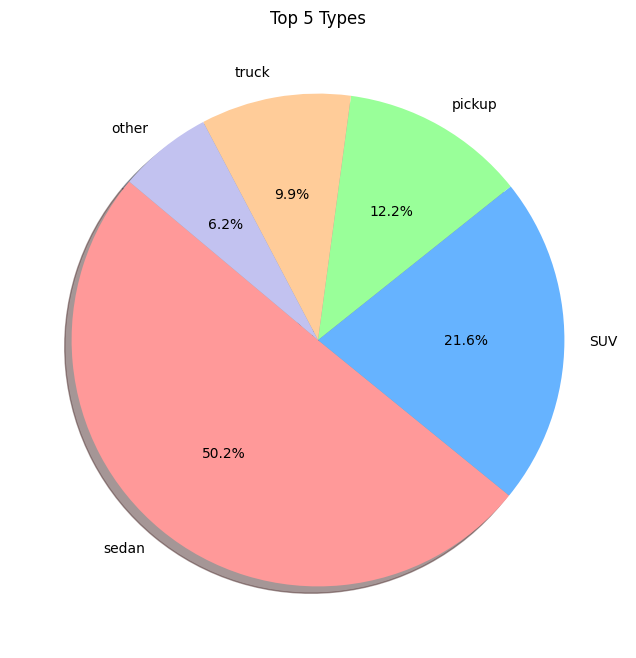

In [23]:
# Plot the top 5 types
df['type'].value_counts().head(5).plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    startangle=140, 
    shadow=True, 
    labels=df['type'].value_counts().head(5).index,  # Use specific labels
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Optional custom colors
)
plt.title('Top 5 Types')
plt.ylabel('')  # Remove the y-axis label for better aesthetics
plt.show()

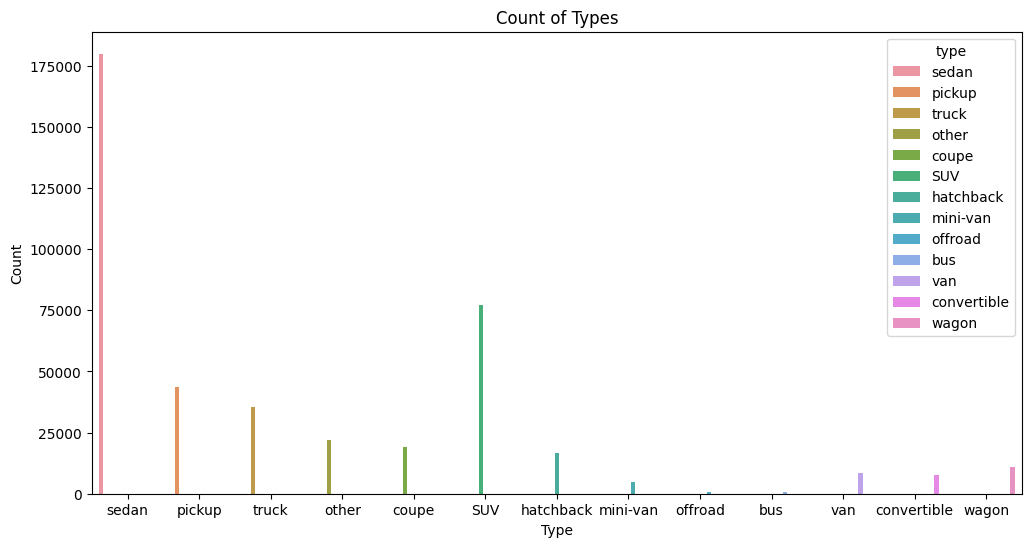

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Create the count plot
sns.countplot(x='type', data=df, hue='type')

# Display the plot
plt.title('Count of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## What is the distribution of cars according to title status?

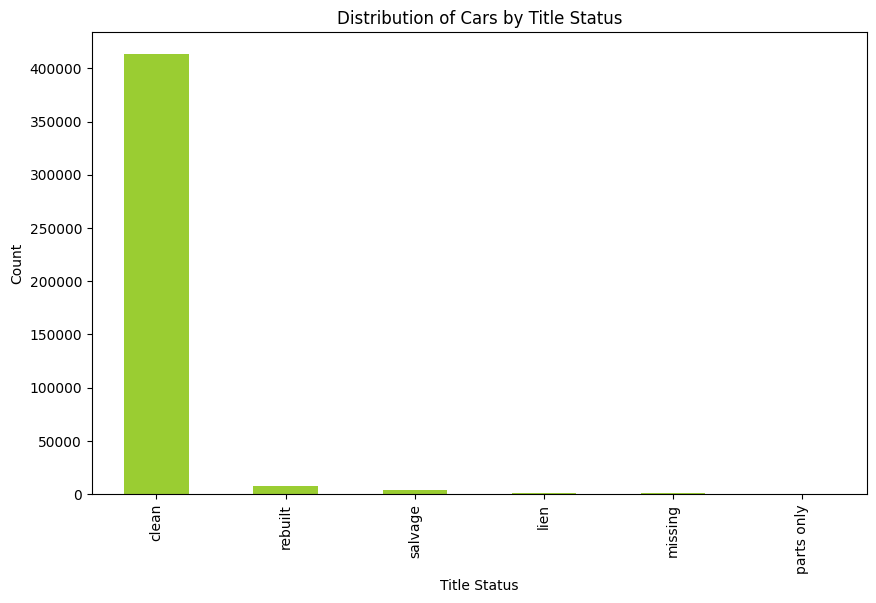

In [25]:
plt.figure(figsize=(10, 6))
df['title_status'].value_counts().plot(kind='bar', color='yellowgreen')
plt.title('Distribution of Cars by Title Status')
plt.xlabel('Title Status')
plt.ylabel('Count')
plt.show()

## What is the trend of data over time?

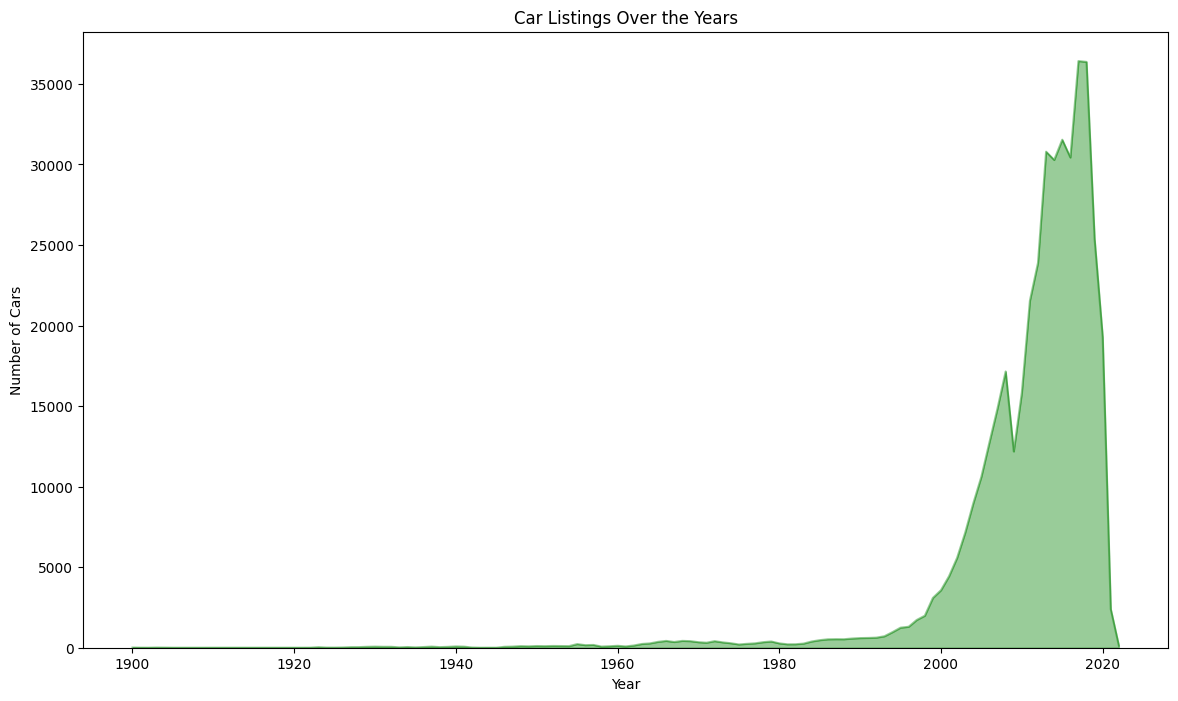

In [26]:
df['year'] = df['year'].astype(int)
yearly_distribution = df.groupby('year')['id'].count()

plt.figure(figsize=(14, 8))
yearly_distribution.plot(kind='area', color='green', alpha=0.4)
plt.title('Car Listings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

## How the price change over years?

Text(0.5, -0.23, 'Scatter plot of price of cars in each year')

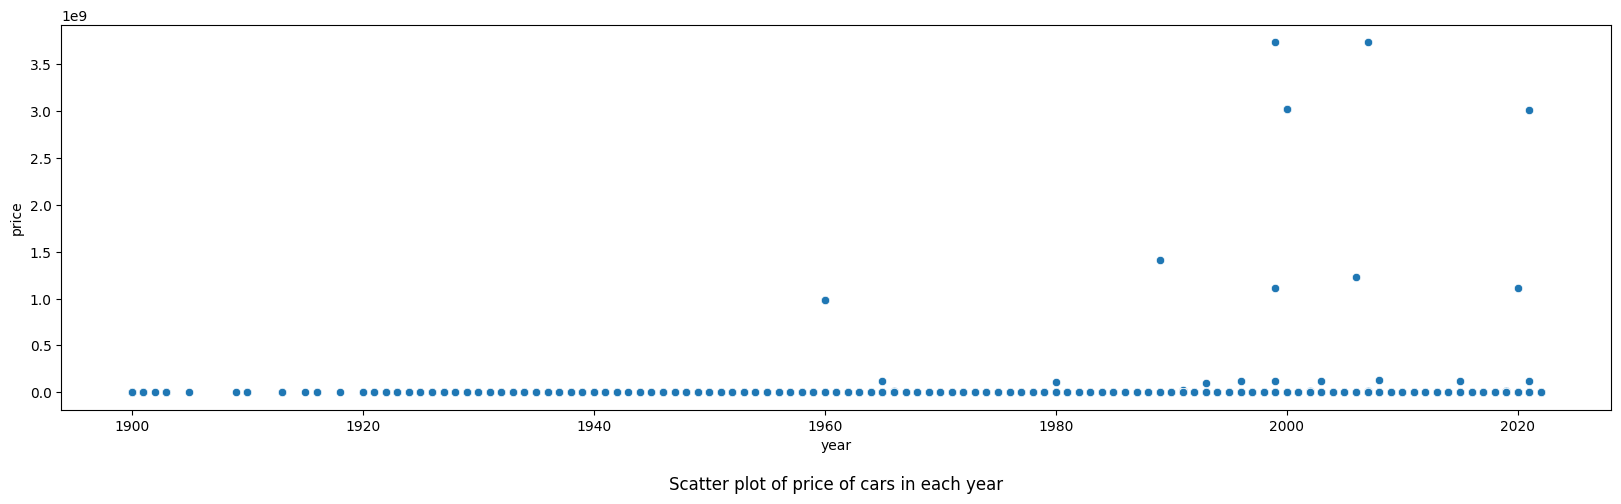

In [27]:
plt.figure(figsize = (20, 5))
sns.scatterplot(x=df['year'],y=df['price'])
plt.title('Scatter plot of price of cars in each year', y=-0.23)

## What is the most popular condition?

In [28]:
df['condition'].value_counts()

condition
good         295560
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

**we can see that the highest is good.**

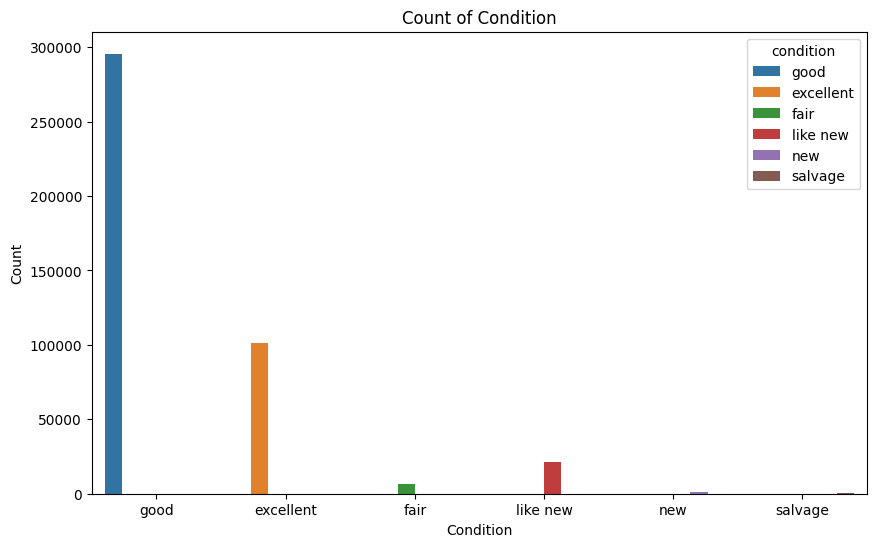

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Create the count plot
sns.countplot(x='condition', data=df, hue='condition')

# Display the plot
plt.title('Count of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

## What is the relation between price and distination?

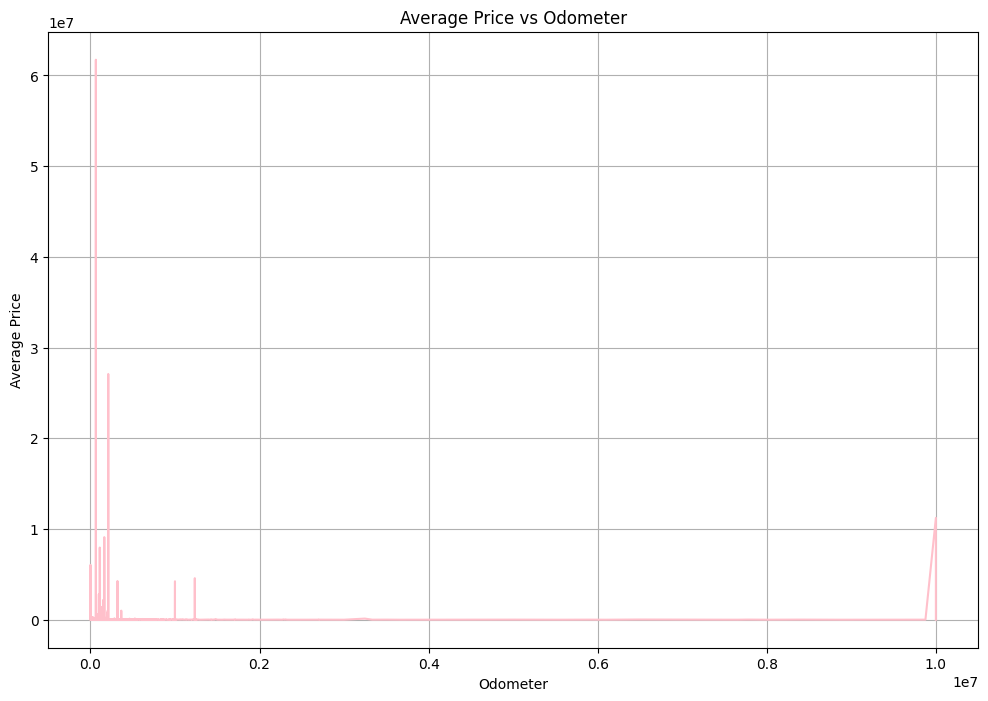

In [43]:
plt.figure(figsize=(12, 8))
df.groupby('odometer')['price'].mean().plot(kind='line', color='pink')
plt.title('Average Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

## What is the corr between price , dis and cylinders?

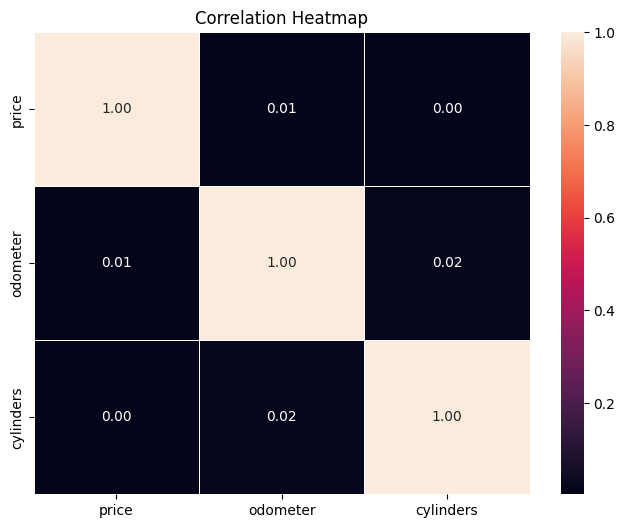

In [31]:
# Calculate the correlation matrix
correlation_matrix = df[['price','odometer','cylinders']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Annotates the heatmap with correlation values
    fmt=".2f",  # Format the annotations to two decimal places
    linewidths=0.5  # Add space between squares
)
plt.title('Correlation Heatmap')
plt.show()

## How price effected by fuel types?

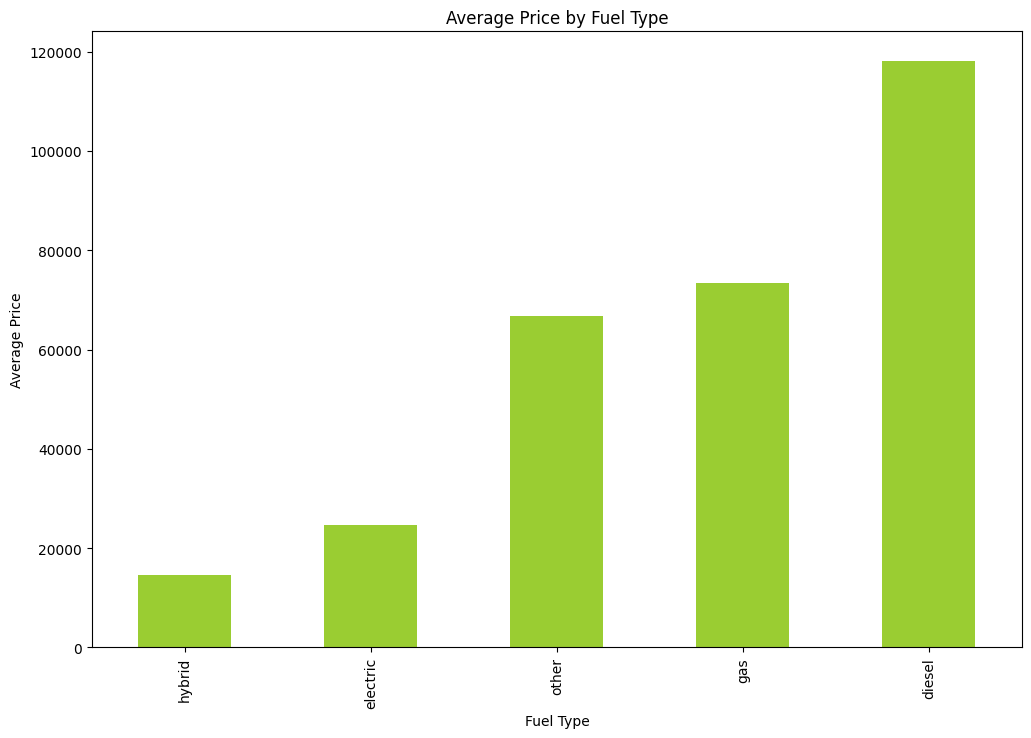

In [32]:
fuel_price_comparison = df.groupby('fuel')['price'].mean().sort_values()
plt.figure(figsize=(12, 8))
fuel_price_comparison.plot(kind='bar', color='yellowgreen')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

## what is the avgr price based on manufacturer?

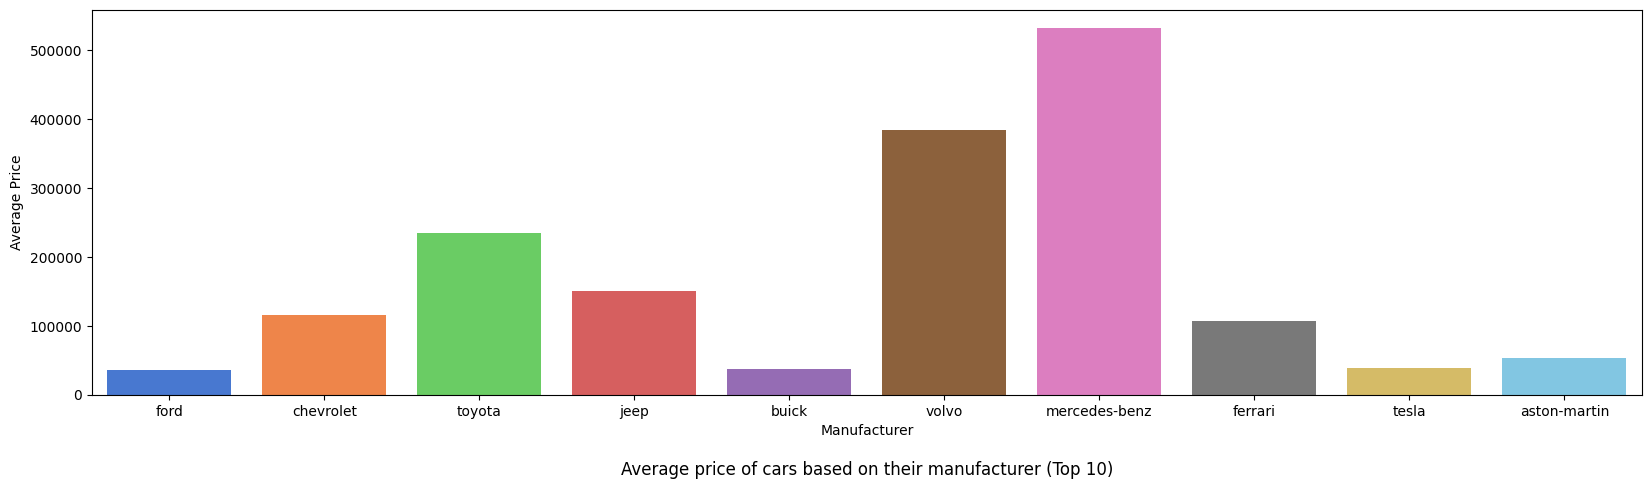

In [45]:
# Calculate the top 10 manufacturers by average price
top_10_manufacturers = (
    df.groupby('manufacturer')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the original DataFrame to include only the top 10 manufacturers
filtered_df = df[df['manufacturer'].isin(top_10_manufacturers)]

# Plot the barplot
plt.figure(figsize=(20, 5))
sns.barplot(
    data=filtered_df, 
    x="manufacturer", 
    y="price", 
    palette='muted', 
    saturation=10, 
    ci=None
)
plt.title('Average price of cars based on their manufacturer (Top 10)', y=-0.23)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.show()


## What is the distribution of cars based on cylinders?

In [55]:
# Number of cars under each cylinder types 

df['cylinders'].value_counts().sort_values()


cylinders
12.0       209
3.0        655
10.0      1455
5.0       1712
8.0      72062
4.0      77642
6.0     271847
Name: count, dtype: int64

In [64]:
cylinder_types = df['cylinders'].dropna().unique() 
cylinder_types

array([ 6.,  8.,  4.,  5.,  3., 10., 12.])

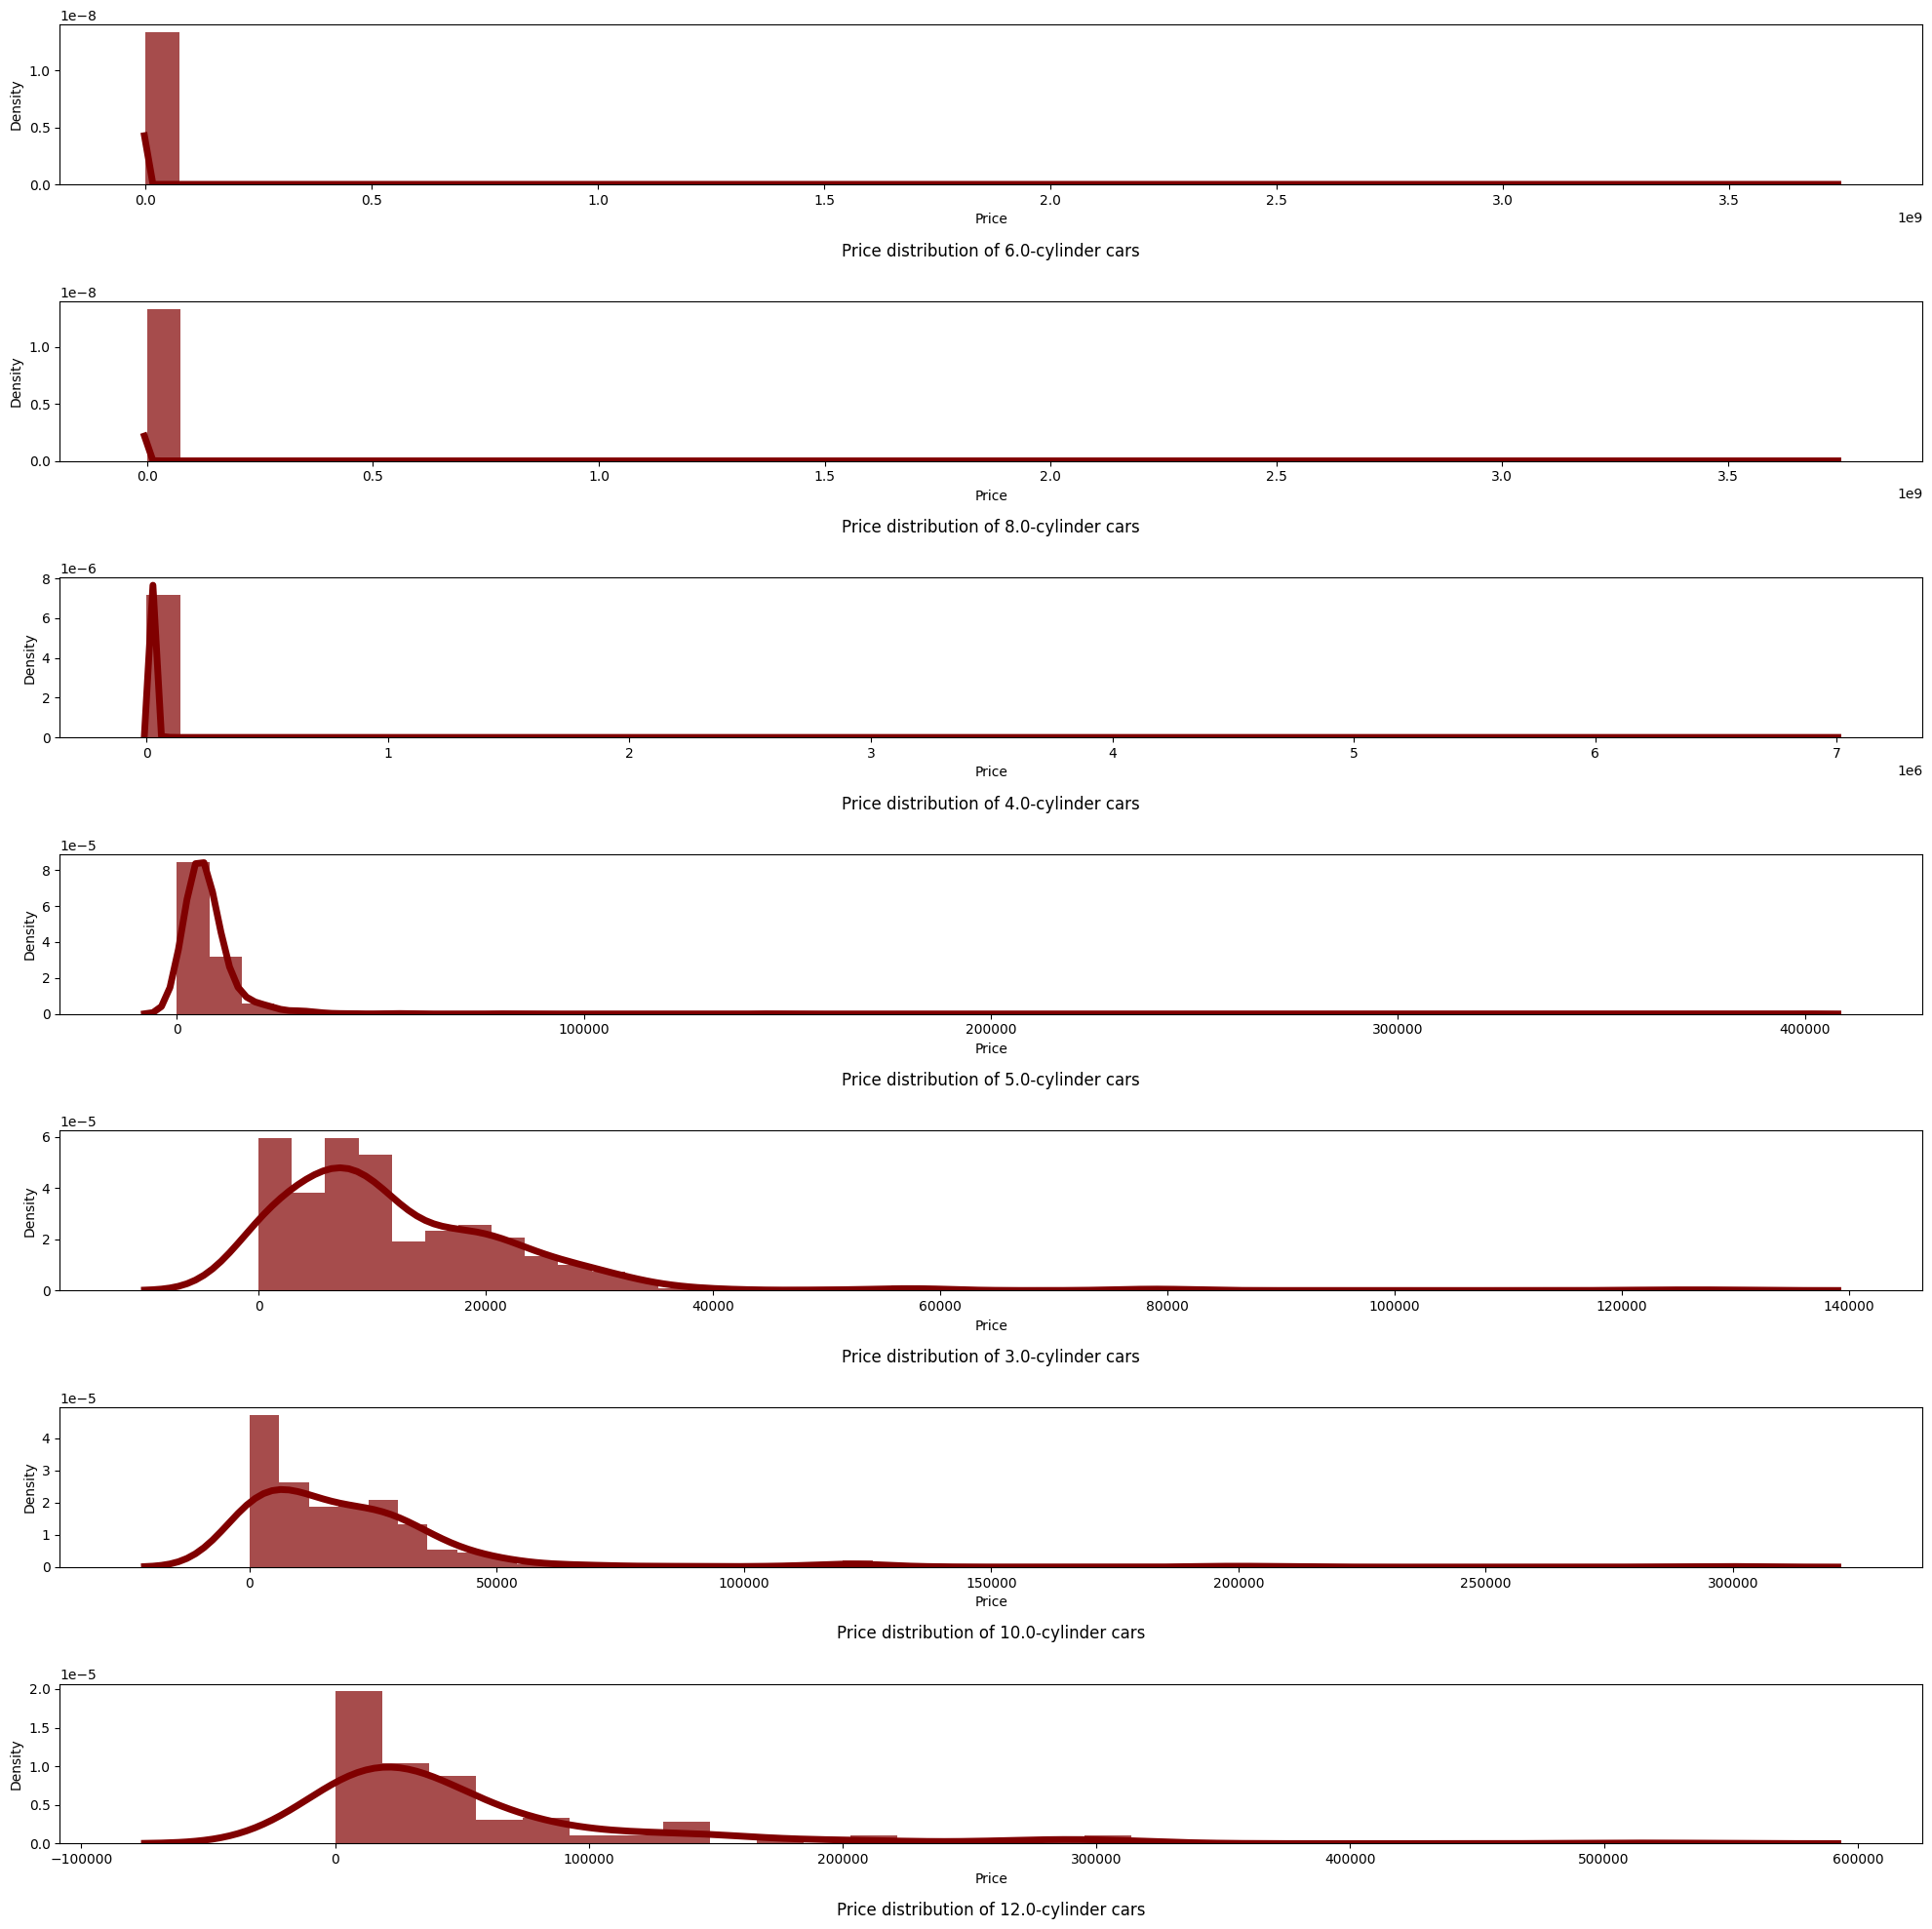

In [70]:
# Set up the figure size
plt.figure(figsize=(20, 20))

# Loop through each cylinder type
for i, cyl in enumerate(cylinder_types, 1):  # Loop with index for subplot positioning
    plt.subplot(len(cylinder_types), 1, i)  # Create a subplot for each cylinder type
    sns.distplot(
        df[df['cylinders'] == cyl]['price'], 
        color='maroon', 
        hist_kws={'alpha': 0.7}, 
        kde_kws={'lw': 5}
    )
    plt.title(f'Price distribution of {cyl}-cylinder cars', y=-0.5)
    plt.xlabel('Price')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


## What is the most state has models in USA?

In [40]:
stat=df.groupby('state').count()['model'].sort_values(ascending=False).head()
stat

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
Name: model, dtype: int64

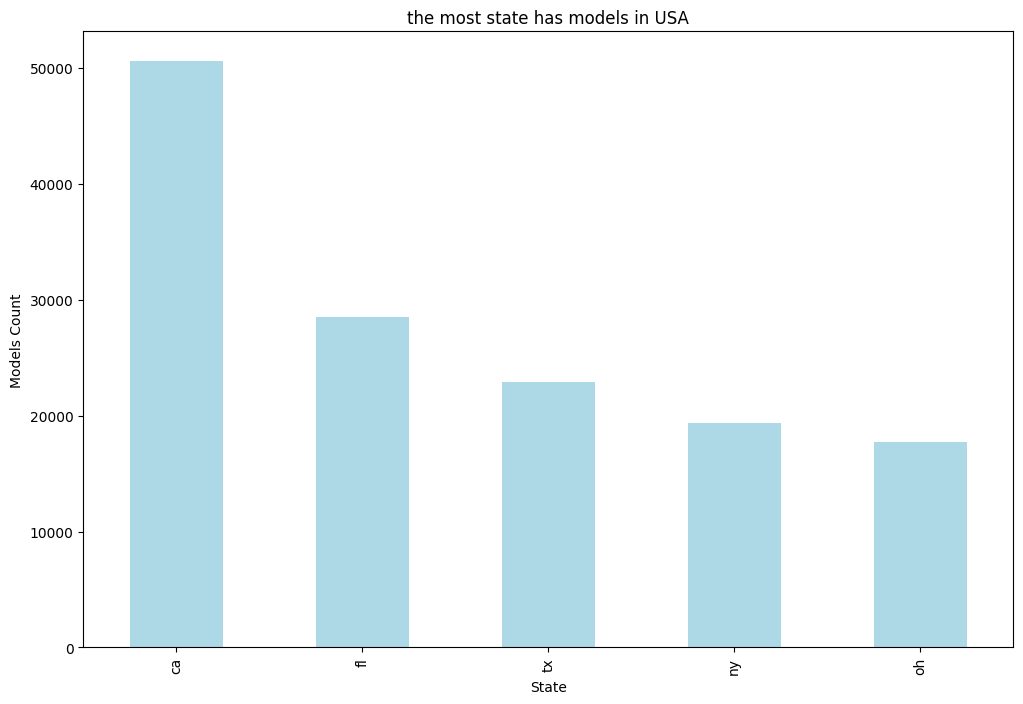

In [41]:
plt.figure(figsize=(12, 8))
stat.plot(kind='bar', color='lightblue')
plt.title('the most state has models in USA')
plt.xlabel('State')
plt.ylabel('Models Count')
plt.show()

## Distribution on the map

Text(0.5, -0.23, 'Fig: Latitude and Longitude of each state')

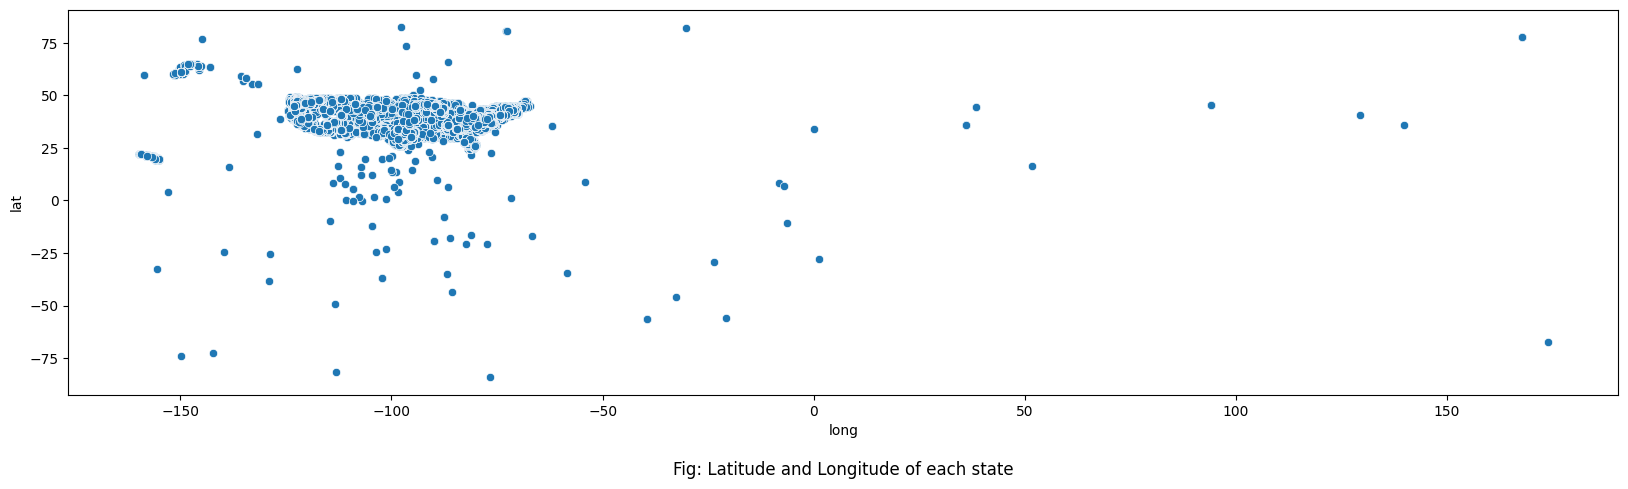

In [36]:
plt.figure(figsize = (20, 5))
sns.scatterplot(x=df['long'],y=df['lat'])
plt.title('Fig: Latitude and Longitude of each state', y=-0.23)

In [38]:
sample_df = df.sample(int(0.01*len(df)))
lat_long_pairs = list(zip(list(df['lat']),list(df['long'])))

In [39]:
map=folium.Map()
HeatMap(lat_long_pairs[50:150]).add_to(map)
map